## Predict Telco Customer Churn

#### Konteks
Memprediksi perilaku untuk mempertahankan pelanggan. Anda dapat menganalisis semua data pelanggan yang relevan dan mengembangkan program retensi pelanggan yang terfokus

#### Konten
- Pelanggan yang pergi dalam sebulan terakhir – kolomnya disebut Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan – telepon, banyak saluran, internet, keamanan online, pencadangan online, perlindungan perangkat, dukungan teknis, serta streaming TV dan film
- Informasi akun pelanggan – sudah berapa lama mereka menjadi pelanggan, kontrak, metode pembayaran, tagihan tanpa kertas, tagihan bulanan, dan total tagihan
- Info demografis tentang pelanggan – jenis kelamin, rentang usia, dan jika mereka memiliki pasangan dan tanggungan

## Process in this Project
Step 1: EDA (Exploratory Data Analysis)
in step 1 :
- How many numerical features may be there (analisis numerical fitur dan ploting)
- How many categorical features may be there (analisis categorical fitur dan ploting)
- Missing values (visualize all the graphs)
- Cleaning or not 

Step 2: Handling missing values
- can use mean, median, mode, or drop them

Step 3: Handling imbalanced data

Step 4: treating the outliers

Step 5: Scaling down the data (standarization or normalisization)

Step 6: convert categorical features into numerical features

Feature Selection (select the best features)
- correlation
- knn
- chi square
- genetic algorithm
- feature importance

### Import Library

In [1]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Load Dataset

In [2]:
df = pd.read_csv('../Datasets/ChurnDataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Exploratory Data Analysis

In [3]:
# show dimensi data
df.shape

(7043, 21)

In [4]:
# check tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# merubah tipe data kolom TotalCharges menjadi numerik
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# melihat value_counts setiap kolom
df_col = df.copy()
df_col.drop(columns=['customerID','Dependents','PaymentMethod','MonthlyCharges','TotalCharges'], inplace=True)
val_col = [col for col in df_col.columns]
for col in val_col:
    print(df_col[col].value_counts())
    print()

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No 

In [7]:
# describe data numeric data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# describe data categorical data
df.describe(include='O')

NumExpr defaulting to 4 threads.


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0556-FJEGU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
# check missing value
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Just Feature TotalCharges have 11 missing value, maybe we can just fill that with mean or median.

### Plotting feature missing value with dependent variable

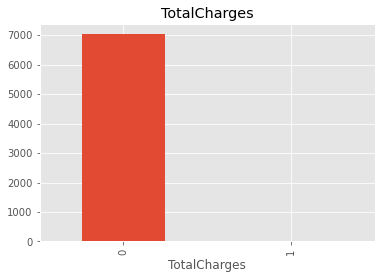

In [10]:
col_na = [feature for feature in df.columns if df[feature].isna().sum()>1]

for feature in col_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isna(), 1, 0)
    data.groupby(feature)['Churn'].count().plot.bar()
    plt.title(feature)
    plt.show()

Because just one feature have missing value, plot just show that graph. Feature TotalCharges have 11 NaN and have more than 6000 value in count

### Numerical Features

We will perform a numerical column analysis of the dependent variable, and we plotting

In [11]:
numeric_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
df[numeric_feature].head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [12]:
# 1. Discrete variable
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique())<25]
df[discrete_feature].head()

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0


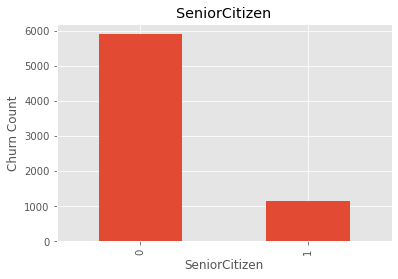

In [13]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['Churn'].count().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Churn Count')
    plt.show()

In [14]:
# 2. Continous variable
continous_feature = [feature for feature in numeric_feature if feature not in discrete_feature]
df[continous_feature].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


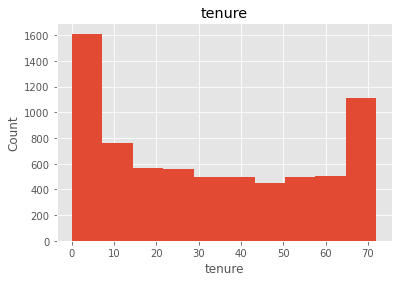

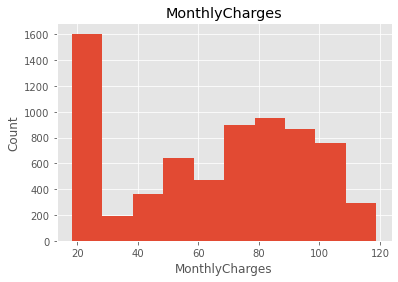

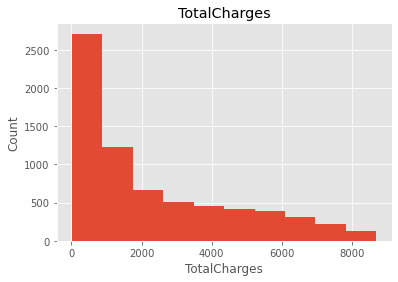

In [15]:
for feature in continous_feature:
    data = df.copy()
    data[feature].hist()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [16]:
# check skewnes in continous variables
df[numeric_feature].skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

### Categorical Features

In [17]:
df2 = df.copy()
df2.drop(columns='customerID', inplace=True)
cat_feature = [feature for feature in df2.columns if df2[feature].dtypes=='O']
df[cat_feature].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


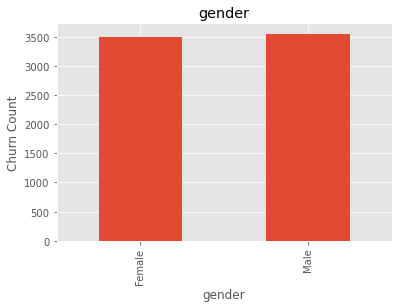

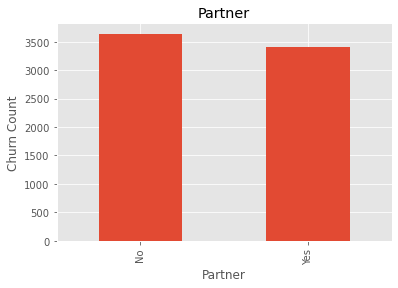

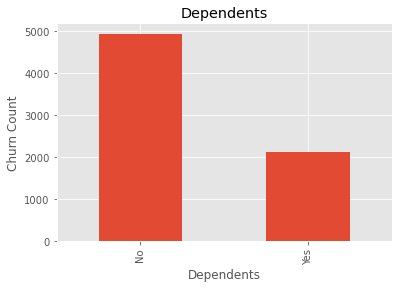

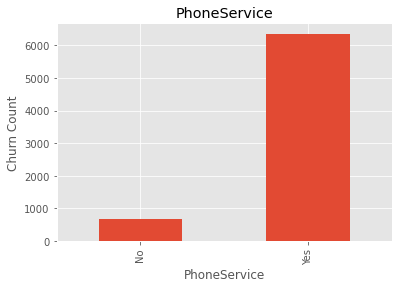

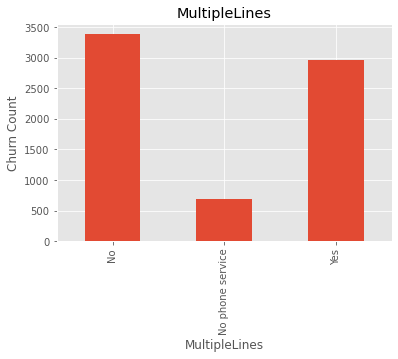

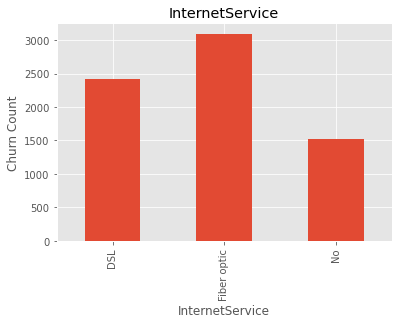

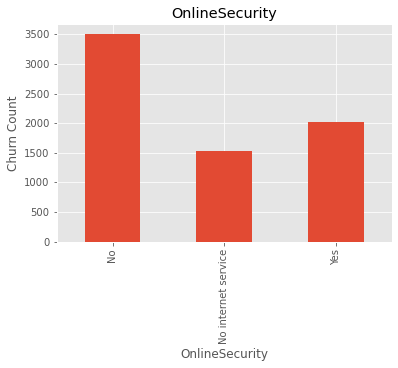

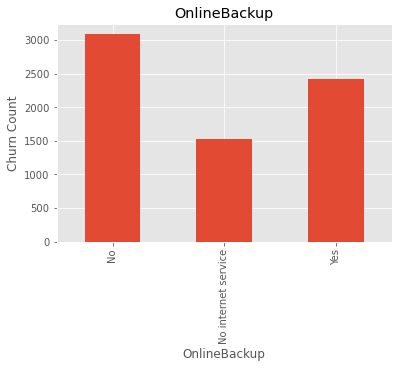

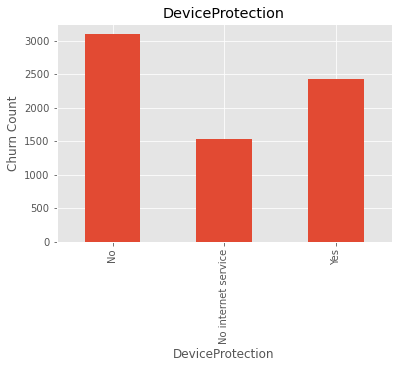

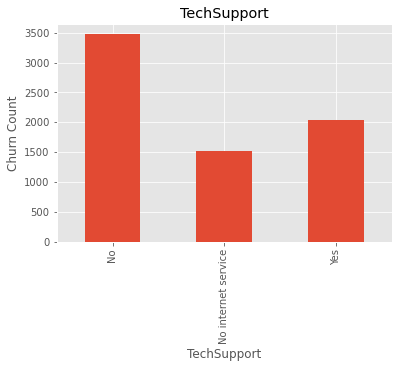

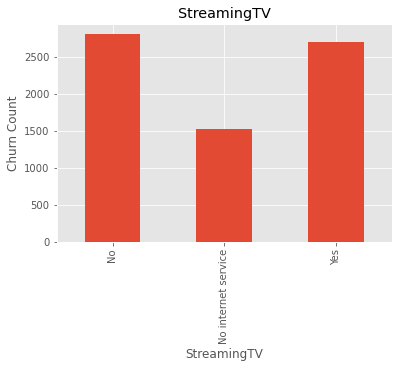

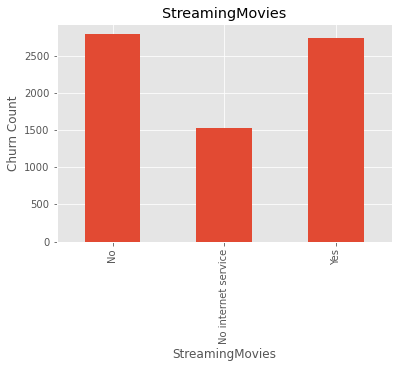

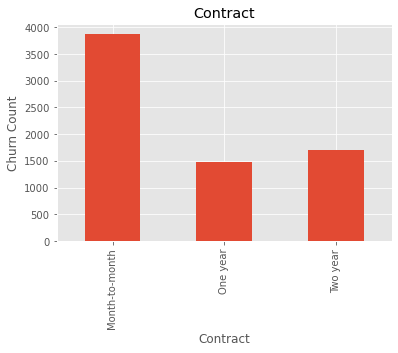

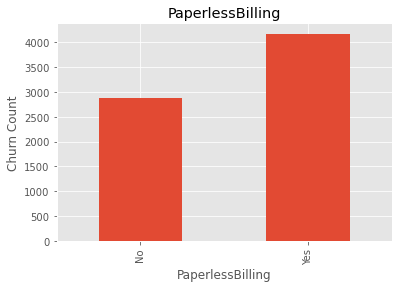

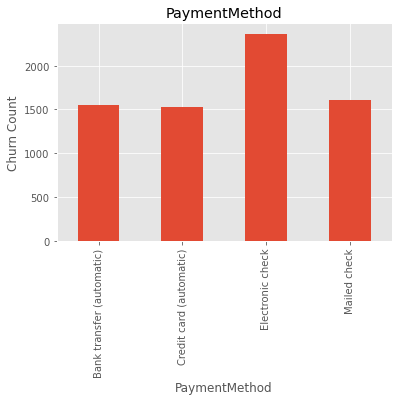

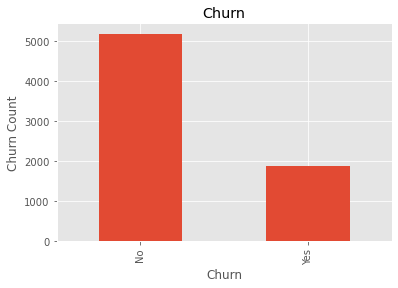

In [18]:
for feature in cat_feature:
    data = df.copy()
    data.groupby(feature)['Churn'].count().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Churn Count')
    plt.show()

In [19]:
# menampilkan jumlah target variabel terhadap categorical fitur
for feature in cat_feature:
    data = df.copy()
    print(data.groupby(feature)['Churn'].count())
    print()

gender
Female    3488
Male      3555
Name: Churn, dtype: int64

Partner
No     3641
Yes    3402
Name: Churn, dtype: int64

Dependents
No     4933
Yes    2110
Name: Churn, dtype: int64

PhoneService
No      682
Yes    6361
Name: Churn, dtype: int64

MultipleLines
No                  3390
No phone service     682
Yes                 2971
Name: Churn, dtype: int64

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: Churn, dtype: int64

OnlineSecurity
No                     3498
No internet service    1526
Yes                    2019
Name: Churn, dtype: int64

OnlineBackup
No                     3088
No internet service    1526
Yes                    2429
Name: Churn, dtype: int64

DeviceProtection
No                     3095
No internet service    1526
Yes                    2422
Name: Churn, dtype: int64

TechSupport
No                     3473
No internet service    1526
Yes                    2044
Name: Churn, dtype: int64

StreamingTV
No                 

### Handling Missing Values

In [20]:
# check missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
# fill columns TotalCharges with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Handling the Outliers

We can see outliers with boxplot or IQR method, we will use that two method.

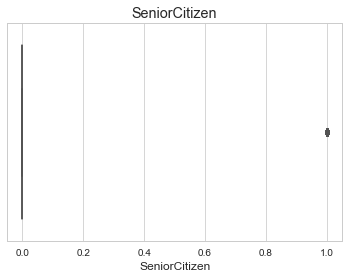

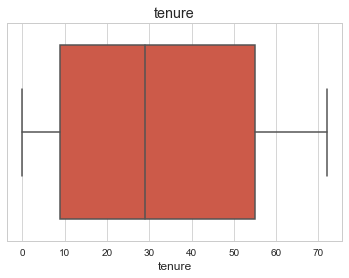

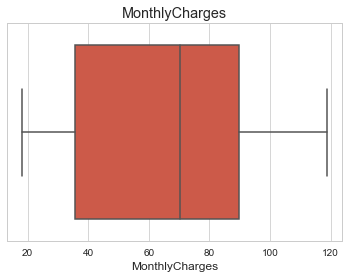

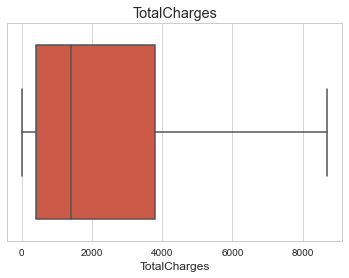

In [22]:
# Use Boxplot
sns.set_style(style='whitegrid')
for feature in numeric_feature:
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

There is no outliers in numerical feature, but we want check with IQR.

In [23]:
# Use IQR 
def iqr(data):
    Q1 = df[data].quantile(0.25)
    Q3 = df[data].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    return df[(df[data]<low) | (df[data]>up)].shape

In [24]:
df.shape

(7043, 21)

In [25]:
iqr('tenure')

(0, 21)

In [26]:
iqr('MonthlyCharges')

(0, 21)

In [27]:
iqr('TotalCharges')

(0, 21)

We can see all dimension for each numeric feature have same shape with df. So, there is no outliers in this dataset.

### Numeric Variables
perform log normal distribution with skewed data numeric

In [28]:
log = ['MonthlyCharges','TotalCharges']
for feature in log:
    df[feature] = np.log(df[feature])

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,3.396185,3.396185,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,4.042174,7.544068,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,3.986202,4.683519,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),3.744787,7.517928,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,4.258446,5.021575,Yes


### Scaling Feature

In [30]:
X = df.drop(['customerID','Churn'], axis=1)
y = df['Churn']

# label encoder
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
X.loc[:, ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']] = \
X.loc[:, ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']].apply(enc.fit_transform)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,3.396185,3.396185
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,4.042174,7.544068
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,3.986202,4.683519
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,3.744787,7.517928
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,4.258446,5.021575


In [31]:
df2 = X.copy()

In [32]:
feature_scale = [feature for feature in df2.columns]
feature_scale

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [33]:
# scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df2[feature_scale])

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.26271103,
        0.07535328],
       [1.        , 0.        , 0.        , ..., 1.        , 0.60763294,
        0.75140267],
       [1.        , 0.        , 0.        , ..., 1.        , 0.5777474 ,
        0.28517155],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.2582203 ,
        0.47492373],
       [1.        , 1.        , 1.        , ..., 1.        , 0.75034671,
        0.45500766],
       [1.        , 0.        , 0.        , ..., 0.        , 0.93758797,
        0.96118816]])

In [34]:
# concat data
data = pd.concat([df[['customerID','Churn']].reset_index(drop=True),
                 pd.DataFrame(scaler.fit_transform(df2[feature_scale]), columns=feature_scale)], axis=1)
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.262711,0.075353
1,5575-GNVDE,No,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.607633,0.751403
2,3668-QPYBK,Yes,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.577747,0.285172
3,7795-CFOCW,No,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.448845,0.747142
4,9237-HQITU,Yes,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.723110,0.340270


### Handling Imbalanced Data

The target variable has imbalanced data, it can affect the accuracy of the model and make the prediction results of the model biased.

In [35]:
ch = data['Churn']
print(f"Customer Churn have {ch.value_counts()[1]} customer, and have percentege of {round(ch.value_counts(normalize=True)[1].mean()*100,2)} % churn")
print(f"Customer did not Churn have {ch.value_counts()[0]} customer, and have percentege of {round(ch.value_counts(normalize=True)[0].mean()*100,2)} % churn")

Customer Churn have 1869 customer, and have percentege of 26.54 % churn
Customer did not Churn have 5174 customer, and have percentege of 73.46 % churn


We see that the data have high imbalanced data, so we can use boosting algorithm or over sampling SMOTE. We use that two method, but have usage difference. 

In [36]:
# handling imbalanced data with SMOTE
# split the data
from collections import Counter
X = data.drop(['customerID','Churn'], axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 19), (1409, 19), (5634,), (1409,))

In [37]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float64'),y_train)

In [39]:
print(f'Before SMOTE {Counter(y_train)}')
print(f'After SMOTE {Counter(y_train_smote)}')

Before SMOTE Counter({'No': 4138, 'Yes': 1496})
After SMOTE Counter({'No': 4138, 'Yes': 4138})
